# Ricardo Gehrke

### PROBLEM ###

An educational institution is facing a high dropout rate directly associated with low academic performance/engagement. Develop a model using machine learning to identify which students are likely to drop out based on their participation in an optional assessment:

Academic institution supports the idea that a student that does not take the SM exam will dropout. Therefore, we need to create a prediciton model to understand the students that will take the SM exam.

Data dictionary:
- DATA_HORA_AVALIACAO: date and time that the exam was taken
- TIPO_AVALIACAO: type of exam
- MATRICULA: student ID
- DISCIPLINA: course ID
- DATA_HORA_ACESSO: date and time of when the exam was accessed
- TEMPO_ACESSO_MINUTOS: minutes taken to complete the exam


# 1. Reading raw data

In [ ]:
import pandas as pd

In [5]:
df_aluno = pd.read_csv('C:\\Users\\rgehrke\\Downloads\\alunos_teste.csv')
df_aluno.head
df_aluno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477825 entries, 0 to 1477824
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MATRICULA   1477825 non-null  int64 
 1   DISCIPLINA  1477825 non-null  object
dtypes: int64(1), object(1)
memory usage: 22.5+ MB


In [6]:
df_prova = pd.read_csv('C:\\Users\\rgehrke\\Downloads\\provas_teste.csv')
df_prova.head

<bound method NDFrame.head of          DATA_HORA_AVALIACAO TIPO_AVALIACAO     MATRICULA DISCIPLINA
0        2022-03-02 17:24:00             EX  202008669936    EGT0047
1        2022-03-03 14:01:49             EX  202008669936    ECJ0004
2        2022-02-21 22:53:41             EX  202008669936    EGT0023
3        2022-03-01 12:09:56             EX  202008669936    ARA1350
4        2022-03-03 13:29:38             EX  202008669936    EGT0067
...                      ...            ...           ...        ...
5684770  2022-06-24 17:29:08            AVS  201408082896    GST1742
5684771  2022-06-24 17:37:47            AVS  201802021779    GST1742
5684772  2022-06-24 19:29:46             EX  202008504694    EGT0028
5684773  2022-06-24 19:34:15             EX  202004215671    GST1674
5684774  2022-06-24 23:26:38            AVS  201902059883    GST1742

[5684775 rows x 4 columns]>

In [7]:
df_acesso = pd.read_csv('C:\\Users\\rgehrke\\Downloads\\acessos_conteudo_teste.csv')
df_acesso.head

<bound method NDFrame.head of              DATA_HORA_ACESSO  TEMPO_ACESSO_MINUTOS     MATRICULA DISCIPLINA
0         2022-02-15 00:01:31                     0  202001189726    EGT0019
1         2022-02-16 14:05:00                    54  202001189726    EGT0019
2         2022-02-20 11:32:13                    28  202001189726    EGT0019
3         2022-03-12 23:51:10                     0  202001189726    EGT0019
4         2022-03-23 17:57:53                   120  202001189726    EGT0019
...                       ...                   ...           ...        ...
10445335  2022-07-06 20:42:08                    24  202002438592    GST1711
10445336  2022-07-06 20:45:23                     0  202204131013    EGT0070
10445337  2022-07-06 22:22:03                     9  202102217491    EGT0068
10445338  2022-07-06 23:01:36                     0  202001307249    GST1719
10445339  2022-07-06 23:02:15                     0  202202631973    EEX0008

[10445340 rows x 4 columns]>

# Cleaning df_aluno

In [8]:
_duplicadas1 = df_aluno.duplicated(subset=['MATRICULA', 'DISCIPLINA'])
#Check for duplicates

In [9]:
num_duplicadas1 = _duplicadas1.sum()
print(f"Numero de linhas duplicadas: {num_duplicadas1}")
#The are 171 duplicated lines

Numero de linhas duplicadas: 171


In [10]:
df_duplicadas1 = df_aluno[_duplicadas1]
print(df_duplicadas1.head())
#print first few lines for reference

           MATRICULA DISCIPLINA
245484  202203284304    EGT0009
481859  202107133741    ARA1350
582737  202201428392    EGT0004
721381  201907152229    EEX0007
876154  200701009457    EGT0070


In [11]:
print(df_aluno.isnull().sum())
#no null values

MATRICULA     0
DISCIPLINA    0
dtype: int64


# Cleaning df_prova

In [12]:
_duplicadas2 = df_prova.duplicated(subset=['DATA_HORA_AVALIACAO', 'TIPO_AVALIACAO', 'MATRICULA', 'DISCIPLINA'])
#checking duplicates

In [13]:
num_duplicadas2 = _duplicadas2.sum()
print(f"Numero de linhas duplicadas: {num_duplicadas2}")
#2494 duplicates

Numero de linhas duplicadas: 2494


In [14]:
df_prova = df_prova.drop_duplicates(subset=['DATA_HORA_AVALIACAO', 'TIPO_AVALIACAO', 'MATRICULA', 'DISCIPLINA'], keep='first')


In [15]:
df_prova.head

<bound method NDFrame.head of          DATA_HORA_AVALIACAO TIPO_AVALIACAO     MATRICULA DISCIPLINA
0        2022-03-02 17:24:00             EX  202008669936    EGT0047
1        2022-03-03 14:01:49             EX  202008669936    ECJ0004
2        2022-02-21 22:53:41             EX  202008669936    EGT0023
3        2022-03-01 12:09:56             EX  202008669936    ARA1350
4        2022-03-03 13:29:38             EX  202008669936    EGT0067
...                      ...            ...           ...        ...
5684770  2022-06-24 17:29:08            AVS  201408082896    GST1742
5684771  2022-06-24 17:37:47            AVS  201802021779    GST1742
5684772  2022-06-24 19:29:46             EX  202008504694    EGT0028
5684773  2022-06-24 19:34:15             EX  202004215671    GST1674
5684774  2022-06-24 23:26:38            AVS  201902059883    GST1742

[5682281 rows x 4 columns]>

In [16]:
print(df_prova.isnull().sum())


DATA_HORA_AVALIACAO    0
TIPO_AVALIACAO         0
MATRICULA              0
DISCIPLINA             0
dtype: int64


# Cleaning df_acesso

In [17]:
_duplicadas3 = df_acesso.duplicated(subset=['DATA_HORA_ACESSO', 'TEMPO_ACESSO_MINUTOS', 'MATRICULA', 'DISCIPLINA'])

In [18]:
num_duplicadas3 = _duplicadas3.sum()
print(f"Numero de linhas duplicadas: {num_duplicadas3}")
#359288 duplicates

Numero de linhas duplicadas: 359288


In [19]:
df_acesso = df_acesso.drop_duplicates(subset=['DATA_HORA_ACESSO', 'TEMPO_ACESSO_MINUTOS', 'MATRICULA', 'DISCIPLINA'], keep='first')

In [20]:
df_acesso.head

<bound method NDFrame.head of              DATA_HORA_ACESSO  TEMPO_ACESSO_MINUTOS     MATRICULA DISCIPLINA
0         2022-02-15 00:01:31                     0  202001189726    EGT0019
1         2022-02-16 14:05:00                    54  202001189726    EGT0019
2         2022-02-20 11:32:13                    28  202001189726    EGT0019
3         2022-03-12 23:51:10                     0  202001189726    EGT0019
4         2022-03-23 17:57:53                   120  202001189726    EGT0019
...                       ...                   ...           ...        ...
10445335  2022-07-06 20:42:08                    24  202002438592    GST1711
10445336  2022-07-06 20:45:23                     0  202204131013    EGT0070
10445337  2022-07-06 22:22:03                     9  202102217491    EGT0068
10445338  2022-07-06 23:01:36                     0  202001307249    GST1719
10445339  2022-07-06 23:02:15                     0  202202631973    EEX0008

[10086052 rows x 4 columns]>

In [21]:
print(df_acesso.isnull().sum())

DATA_HORA_ACESSO        0
TEMPO_ACESSO_MINUTOS    0
MATRICULA               0
DISCIPLINA              0
dtype: int64


# 2. Visualization

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing df_aluno

In [23]:
#Understand with how many courses and students we are working with
print(f"Quantidade de disciplinas diferentes: {df_aluno['DISCIPLINA'].nunique()}")
print(f"Quantidade de matrículas diferentes: {df_aluno['MATRICULA'].nunique()}")

Quantidade de disciplinas diferentes: 1092
Quantidade de matrículas diferentes: 289635


High value, therefore, we will limit the number of courses and students in visualization

C:\Users\rgehrke\AppData\Local\Temp\ipykernel_9208\3493305127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_disciplinas.values, y=top_10_disciplinas.index, palette='Blues_d')


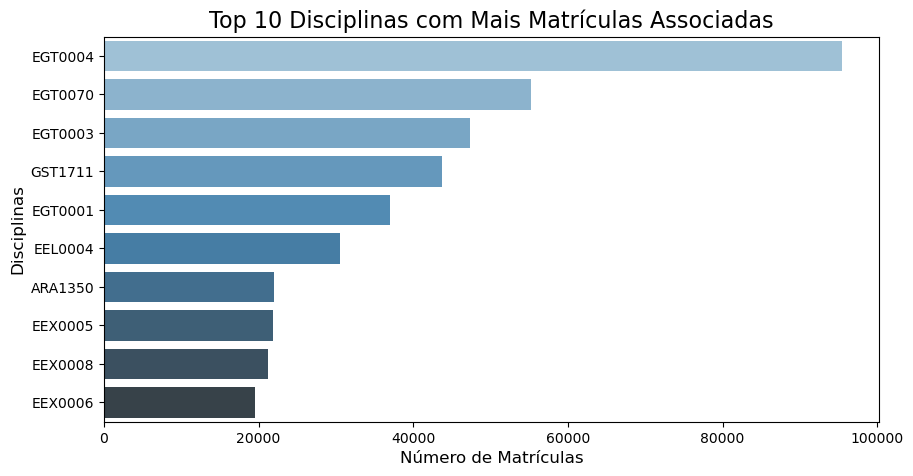

In [24]:
#Top 10 courses with students registrated
matriculas_por_disciplina = df_aluno['DISCIPLINA'].value_counts()

#selecting the top 10
top_10_disciplinas = matriculas_por_disciplina.head(10)

#bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_disciplinas.values, y=top_10_disciplinas.index, palette='Blues_d')
plt.title('Top 10 Disciplinas com Mais Matrículas Associadas', fontsize=16)
plt.xlabel('Número de Matrículas', fontsize=12)
plt.ylabel('Disciplinas', fontsize=12)
plt.show()

Questions and insights:

EGT0004 has the highest number of enrolled students. Is the number of enrollments related to dropout rates?
EGT0004 has high demand, but is it being properly offered? Are there courses with low demand?
Since high-demand courses involve more students, the top 10 courses could become the focus of the research.

# Visualizing df_prova

<Axes: title={'center': 'Distribuição dos Tipos de Avaliação'}, xlabel='TIPO_AVALIACAO'>

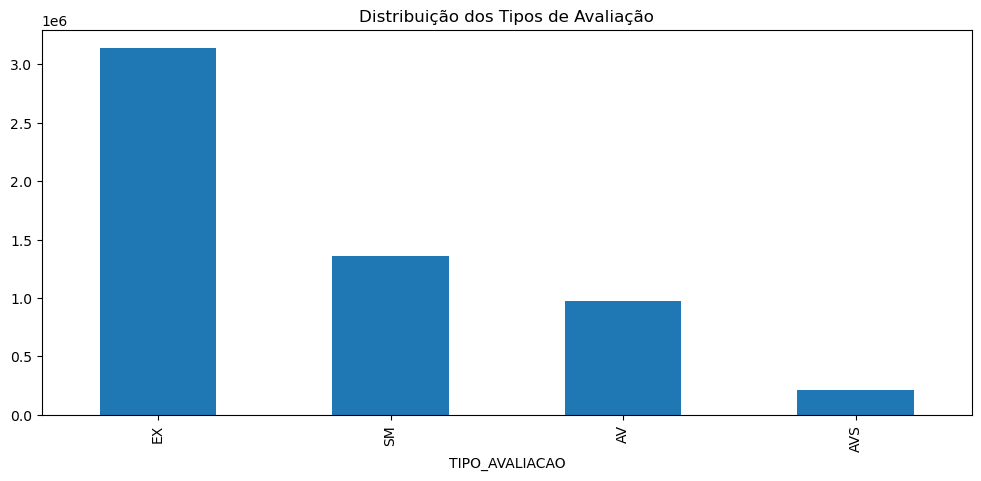

In [25]:
df_prova['TIPO_AVALIACAO'].value_counts().plot(kind='bar', figsize=(12, 5), title='Distribuição dos Tipos de Avaliação')

According to the graph above, almost 1.5 million SM were conducted. EX was the most frequently performed type of assessment. The graph is inconclusive but provides an overall view of the data.

<Axes: title={'center': 'Top 10 Disciplinas com Mais Avaliações'}, xlabel='DISCIPLINA'>

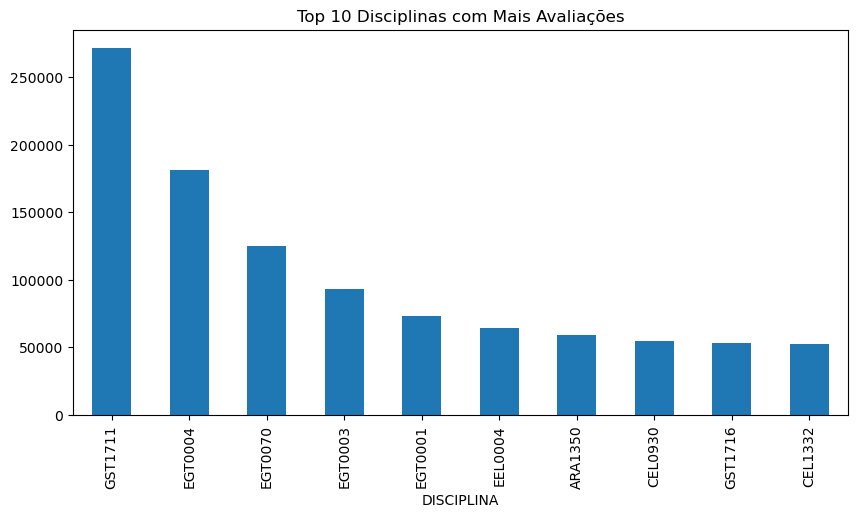

In [26]:
df_prova['DISCIPLINA'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Disciplinas com Mais Avaliações')

GST1711 and ETG0004 appear as the courses with more exams conducted.

<Axes: title={'center': 'Proporção dos Tipos de Avaliação'}, ylabel='count'>

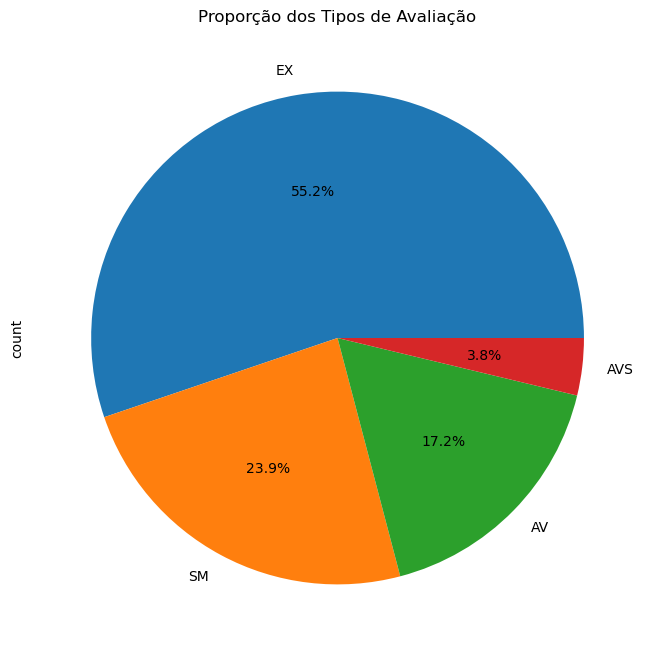

In [27]:
df_prova['TIPO_AVALIACAO'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Proporção dos Tipos de Avaliação')


Once again, obtaining a general view of the raw data, SM accounts for 23.9% of the total assessments.

<Axes: title={'center': 'Distribuição dos Tipos de Avaliação por Disciplina'}, xlabel='DISCIPLINA'>

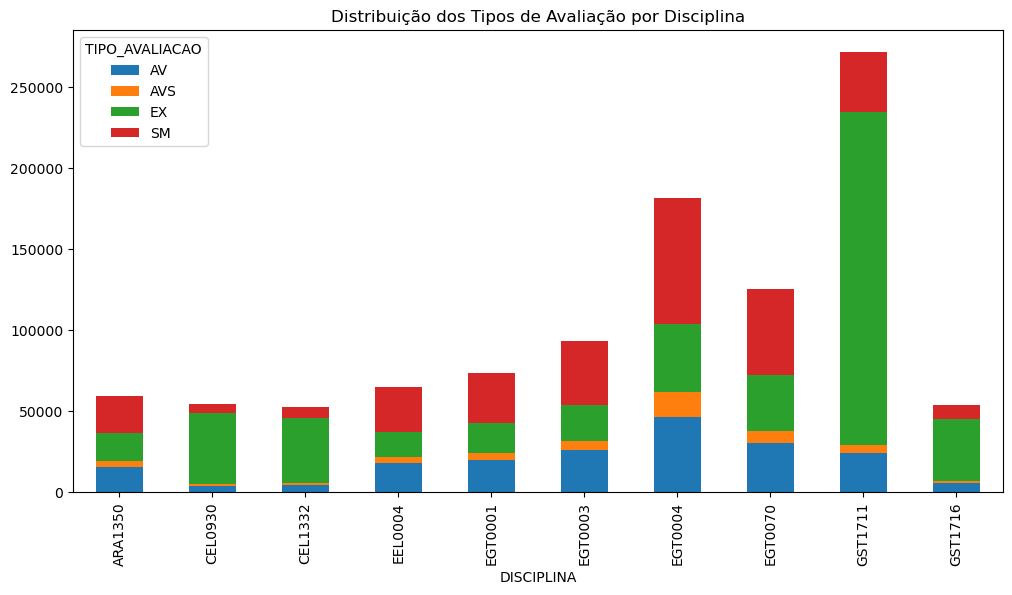

In [28]:
top_disciplinas = df_prova['DISCIPLINA'].value_counts().head(10).index
filtered_df = df_prova[df_prova['DISCIPLINA'].isin(top_disciplinas)]
pd.crosstab(filtered_df['DISCIPLINA'], filtered_df['TIPO_AVALIACAO']).plot(kind='bar', stacked=True, figsize=(12, 6), title='Distribuição dos Tipos de Avaliação por Disciplina')

Relationship between the top 10 courses and their respective assessments conducted.

Questions and insights:

Courses with a high number of enrolled students also have a high number of assessments conducted.
However, a course with a high number of assessments does not necessarily indicate a high dropout rate, as seen with EGT0004, which has a high number of SM. More concerning courses would be CEL1332 or GST1711, for example.

# Visualization df_acesso

DISCIPLINA
EGT0070    620172
EGT0004    479598
EEX0005    308068
GST1711    298008
EGT0003    200742
EGT0001    185155
EEX0006    166931
EEL0004    155716
ARA1419    134475
EGT0009    127197
dtype: int64


<Axes: title={'center': 'Top 10 Disciplinas com Mais Acessos'}, xlabel='DISCIPLINA'>

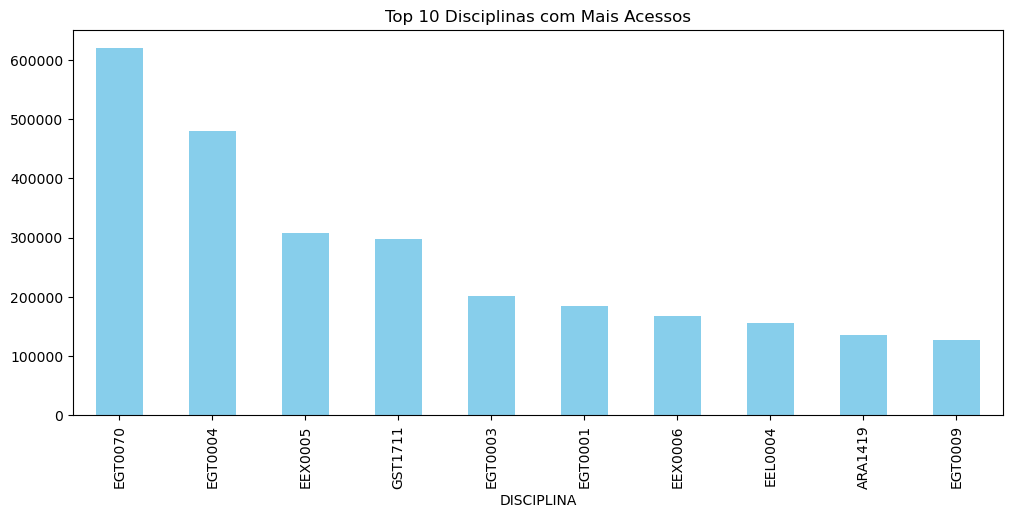

In [29]:
#groupby discipline
top_disciplinas_acessos = df_acesso.groupby('DISCIPLINA').size().sort_values(ascending=False).head(10)
#print
print(top_disciplinas_acessos)
#top 10 courses with more access
top_disciplinas_acessos.plot(kind='bar', figsize=(12, 5), title='Top 10 Disciplinas com Mais Acessos', color='skyblue')

# 3. Grouping data by student-course

Focusing on the target—students who will not take the SM assessment and will consequently drop out—features will be created:

total_acesso: Total number of accesses per enrollment
tempo_acesso: Sum of access time per enrollment
av_realizadas: Total number of assessments completed per enrollment

In [30]:
#Total access per student ID
total_acessos = df_acesso.groupby('MATRICULA').size()

#Sum of access time per student ID
tempo_acesso = df_acesso.groupby('MATRICULA')['TEMPO_ACESSO_MINUTOS'].sum()

#Amount of exams conducted by student ID
av_realizadas = df_prova.groupby('MATRICULA').size()

#Merge of features
df_features = df_aluno.copy()
df_features = df_features.set_index('MATRICULA')
df_features['TOTAL_ACESSOS'] = total_acessos
df_features['TEMPO_ACESSOS'] = tempo_acesso
df_features['AVALIACOES_REALIZADAS'] = av_realizadas


#Indicate 0 instead of NaN
df_features = df_features.fillna(0)

#Print final manipulated data frame
print(df_features.head())

             DISCIPLINA  TOTAL_ACESSOS  TEMPO_ACESSOS  AVALIACOES_REALIZADAS
MATRICULA                                                                   
202204035316    DGT0336            0.0            0.0                   13.0
202110113321    CCJ0164           15.0          331.0                    1.0
202001682635    DGT0002           25.0          434.0                    4.0
202204035316    EEX0002            0.0            0.0                   13.0
202201387645    CCE2063           63.0         3313.0                   27.0


Establishing the target:
Students who took the SM assessment will be labeled as 1, while those who did not take the SM assessment will be labeled as 0.

In [31]:
#Fitler only student who have taken SM
alunos_com_SM = df_prova[df_prova['TIPO_AVALIACAO'] == 'SM']['MATRICULA'].unique()

#new column SM_REALIZADA: 1 in case they took SM, 0 if they did not
df_aluno['SM_REALIZADA'] = df_aluno['MATRICULA'].apply(lambda x: 1 if x in alunos_com_SM else 0)

#verify proportion of SM taken
print(df_aluno['SM_REALIZADA'].value_counts())

SM_REALIZADA
1    1076424
0     401401
Name: count, dtype: int64


# 4. Merging all data frames

In [32]:
#encounter unique combination of student-course IDs, this will drop duplicates
keys = df_aluno[['MATRICULA', 'DISCIPLINA']].drop_duplicates()

#Filter df_acesso based on the key student ID and course ID
df_acesso_filtered = df_acesso.merge(keys, on=['MATRICULA', 'DISCIPLINA'], how='inner')

#repeat step above with different data frame
df_prova_filtered = df_prova.merge(keys, on=['MATRICULA', 'DISCIPLINA'], how='inner')

#repeat stpe above with df_features
df_features_filtered = df_features.merge(keys, on=['MATRICULA', 'DISCIPLINA'], how='inner')


In [33]:
#Merging
df_merged = pd.merge(
    df_aluno,
    df_acesso_filtered,
    on=['MATRICULA', 'DISCIPLINA'],
    how='left'
)

df_merged = pd.merge(
    df_merged,
    df_prova_filtered,
    on=['MATRICULA', 'DISCIPLINA'],
    how='left'
)

df_merged = pd.merge(
    df_merged,
    df_features_filtered,
    on=['MATRICULA', 'DISCIPLINA'],
    how='left'
)


In [34]:
df_merged.head()
#visualize result in table

,MATRICULA,DISCIPLINA,SM_REALIZADA,DATA_HORA_ACESSO,TEMPO_ACESSO_MINUTOS,DATA_HORA_AVALIACAO,TIPO_AVALIACAO,TOTAL_ACESSOS,TEMPO_ACESSOS,AVALIACOES_REALIZADAS
0,202204035316,DGT0336,1,NaN,NaN,NaN,NaN,0.0,0.0,13.0
1,202110113321,CCJ0164,0,NaN,NaN,NaN,NaN,15.0,331.0,1.0
2,202001682635,DGT0002,1,NaN,NaN,NaN,NaN,25.0,434.0,4.0
3,202204035316,EEX0002,1,NaN,NaN,NaN,NaN,0.0,0.0,13.0
4,202201387645,CCE2063,1,2022-04-19 12:17:18,58.0,2022-04-29 09:00:43,EX,63.0,3313.0,27.0


In [35]:
df_merged.info()
#info about new data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80974227 entries, 0 to 80974226
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MATRICULA              int64  
 1   DISCIPLINA             object 
 2   SM_REALIZADA           int64  
 3   DATA_HORA_ACESSO       object 
 4   TEMPO_ACESSO_MINUTOS   float64
 5   DATA_HORA_AVALIACAO    object 
 6   TIPO_AVALIACAO         object 
 7   TOTAL_ACESSOS          float64
 8   TEMPO_ACESSOS          float64
 9   AVALIACOES_REALIZADAS  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 6.0+ GB


In [36]:
#Stratified Sampling Based on the Target (SM_REALIZADA)
#A stratified sample based on the target means that it will maintain the same proportion of students who took the SM as in the original dataframe.
amostra = df_merged.groupby('SM_REALIZADA', group_keys=False).apply(
    lambda x: x.sample(frac=0.10, random_state=42)  # using 1% as an example
)

#reseting index
amostra = amostra.reset_index(drop=True)

#verifying the sample size
print("Tamanho da amostra:", amostra.shape)

C:\Users\rgehrke\AppData\Local\Temp\ipykernel_9208\681914975.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra = df_merged.groupby('SM_REALIZADA', group_keys=False).apply(


Tamanho da amostra: (8097423, 10)


DISCIPLINA
GST1711    380740
EGT0070    201447
EGT0004    166334
CEL0466    149659
GST2023    140088
CEL0930    135829
CCJ0279    120161
EEX0005     98365
CEL0242     88526
CEL1390     88014
dtype: int64


<Axes: title={'center': 'Top 10 Disciplinas com Mais Acessos'}, xlabel='DISCIPLINA'>

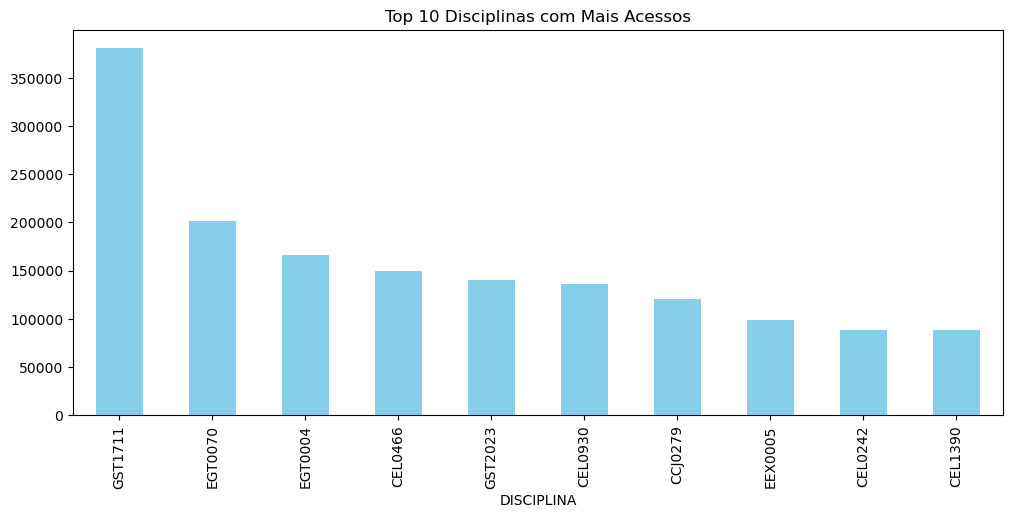

In [37]:
#Groupby
top_disciplinas_acessos1 = amostra.groupby('DISCIPLINA').size().sort_values(ascending=False).head(10)
print(top_disciplinas_acessos1)
#Plot top 10 courses with more accesses
top_disciplinas_acessos1.plot(kind='bar', figsize=(12, 5), title='Top 10 Disciplinas com Mais Acessos', color='skyblue')

In [38]:
#count valeus of SM
sm_counts = amostra['SM_REALIZADA'].value_counts()

print(sm_counts)

SM_REALIZADA
1    7887048
0     210375
Name: count, dtype: int64


Even with the three tables merged and a sample created, it is not guaranteed that this sample will reflect the exact numbers presented in the df_merged. Therefore, columns that require duplicating student-course combinations will be excluded to keep only:

The student-course unit.
The target SM_REALIZADA.
The features: total access, access time, and number of assessments completed.

In [40]:
#Removing specified columns
colunas_para_remover = ['DATA_HORA_ACESSO', 'TEMPO_ACESSO_MINUTOS', 'DATA_HORA_AVALIACAO', 'TIPO_AVALIACAO']
df_merged_nova = df_merged.drop(columns=colunas_para_remover)

#remove duplicates and keep first
df_merged_nova = df_merged_nova.drop_duplicates(keep='first')

#Print result
print(df_merged_nova.head())


      MATRICULA DISCIPLINA  SM_REALIZADA  TOTAL_ACESSOS  TEMPO_ACESSOS  \
0  202204035316    DGT0336             1            0.0            0.0   
1  202110113321    CCJ0164             0           15.0          331.0   
2  202001682635    DGT0002             1           25.0          434.0   
3  202204035316    EEX0002             1            0.0            0.0   
4  202201387645    CCE2063             1           63.0         3313.0   

   AVALIACOES_REALIZADAS  
0                   13.0  
1                    1.0  
2                    4.0  
3                   13.0  
4                   27.0  


In [41]:
df_merged_nova.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477654 entries, 0 to 80974212
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   MATRICULA              1477654 non-null  int64  
 1   DISCIPLINA             1477654 non-null  object 
 2   SM_REALIZADA           1477654 non-null  int64  
 3   TOTAL_ACESSOS          1477654 non-null  float64
 4   TEMPO_ACESSOS          1477654 non-null  float64
 5   AVALIACOES_REALIZADAS  1477654 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 78.9+ MB


In [42]:
df_merged_nova.head

<bound method NDFrame.head of              MATRICULA DISCIPLINA  SM_REALIZADA  TOTAL_ACESSOS  TEMPO_ACESSOS  \
0         202204035316    DGT0336             1            0.0            0.0   
1         202110113321    CCJ0164             0           15.0          331.0   
2         202001682635    DGT0002             1           25.0          434.0   
3         202204035316    EEX0002             1            0.0            0.0   
4         202201387645    CCE2063             1           63.0         3313.0   
...                ...        ...           ...            ...            ...   
80974206  202108798835    CCA1318             0            6.0           56.0   
80974207  202109296698    CCA1318             1            2.0          105.0   
80974208  202108315559    EEX0122             0            1.0            4.0   
80974209  201803012412    CEL1370             1           80.0          184.0   
80974212  201912005034    EEL0015             1           17.0          544.0  

In [43]:
df_merged_nova.reset_index(drop=True, inplace=True)

In [44]:
df_merged_nova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477654 entries, 0 to 1477653
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   MATRICULA              1477654 non-null  int64  
 1   DISCIPLINA             1477654 non-null  object 
 2   SM_REALIZADA           1477654 non-null  int64  
 3   TOTAL_ACESSOS          1477654 non-null  float64
 4   TEMPO_ACESSOS          1477654 non-null  float64
 5   AVALIACOES_REALIZADAS  1477654 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 67.6+ MB


The df_merged_nova table is now organized by the student-course unit, with the target (SM_REALIZADA), and the respective features in the table.

# 5. Scaling

In [45]:
#Unify the columns "Matricula" and "Disciplina", and keep only columns with quantitative values
#Create a new column 'MATRICULA_DISCIPLINA' by combining the two columns.
df_merged_nova['MATRICULA_DISCIPLINA'] = df_merged_nova['MATRICULA'].astype(str) + '-' + df_merged_nova['DISCIPLINA']

#Remove old columns
df_merged_nova = df_merged_nova.drop(columns=['MATRICULA', 'DISCIPLINA'])

#Print resulting dataframe
print(df_merged_nova.head())


   SM_REALIZADA  TOTAL_ACESSOS  TEMPO_ACESSOS  AVALIACOES_REALIZADAS  \
0             1            0.0            0.0                   13.0   
1             0           15.0          331.0                    1.0   
2             1           25.0          434.0                    4.0   
3             1            0.0            0.0                   13.0   
4             1           63.0         3313.0                   27.0   

   MATRICULA_DISCIPLINA  
0  202204035316-DGT0336  
1  202110113321-CCJ0164  
2  202001682635-DGT0002  
3  202204035316-EEX0002  
4  202201387645-CCE2063  


In [46]:
#Move 'MATRICULA_DISCIPLINA' to first
colunas = ['MATRICULA_DISCIPLINA'] + [col for col in df_merged_nova.columns if col != 'MATRICULA_DISCIPLINA']
df_merged_nova = df_merged_nova[colunas]

#Print
print(df_merged_nova.head())

   MATRICULA_DISCIPLINA  SM_REALIZADA  TOTAL_ACESSOS  TEMPO_ACESSOS  \
0  202204035316-DGT0336             1            0.0            0.0   
1  202110113321-CCJ0164             0           15.0          331.0   
2  202001682635-DGT0002             1           25.0          434.0   
3  202204035316-EEX0002             1            0.0            0.0   
4  202201387645-CCE2063             1           63.0         3313.0   

   AVALIACOES_REALIZADAS  
0                   13.0  
1                    1.0  
2                    4.0  
3                   13.0  
4                   27.0  


In [47]:
#count values
sm_counts = df_merged_nova['SM_REALIZADA'].value_counts()

print(sm_counts)

SM_REALIZADA
1    1076347
0     401307
Name: count, dtype: int64


Normalize with 0 as the minimum value and 1 as the maximum value using MinMaxScaler

In [48]:
from sklearn.preprocessing import MinMaxScaler

#Select only numeric columns
colunas_numericas = df_merged_nova.select_dtypes(include=['float64', 'int64']).columns

#Initialize scaler
scaler = MinMaxScaler()

#Apply scaler on numeric columns
df_merged_nova[colunas_numericas] = scaler.fit_transform(df_merged_nova[colunas_numericas])

#Print normalized dataframe
print(df_merged_nova.head())


   MATRICULA_DISCIPLINA  SM_REALIZADA  TOTAL_ACESSOS  TEMPO_ACESSOS  \
0  202204035316-DGT0336           1.0       0.000000       0.000000   
1  202110113321-CCJ0164           0.0       0.011005       0.010688   
2  202001682635-DGT0002           1.0       0.018342       0.014014   
3  202204035316-EEX0002           1.0       0.000000       0.000000   
4  202201387645-CCE2063           1.0       0.046222       0.106978   

   AVALIACOES_REALIZADAS  
0               0.004410  
1               0.000339  
2               0.001357  
3               0.004410  
4               0.009159  


# 6. Split dataframe to train and test

In [49]:
from sklearn.model_selection import train_test_split

#Defite features x and targey y
#with'SM_REALIZADA' being target
X = df_merged_nova.drop(columns=['SM_REALIZADA'])  #Features (remove target)
y = df_merged_nova['SM_REALIZADA']                #Target

#Train (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#print respective sizes
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (1182123, 4)
Tamanho do conjunto de teste: (295531, 4)


# 7. Choosing performance metric of the algorithm

The main metric chosen was recall, which helps us understand if the model correctly identified the students who actually dropped out. The chosen algorithm was random forest, which provides robustness against overfitting—an important factor when working with large and complex datasets. In practice, overfitting occurs when the model is too closely fitted to the training data, struggling to generalize to the broader characteristics of the dataframe that might appear in the test.

In [51]:
from sklearn.metrics import accuracy_score, classification_report


# 8. Training and evaluating the model's performance

In [52]:
X_train = X_train.drop(columns=['MATRICULA_DISCIPLINA'])
X_test = X_test.drop(columns=['MATRICULA_DISCIPLINA'])

from sklearn.ensemble import RandomForestClassifier

#Instance the model
model = RandomForestClassifier(random_state=42)

#Training the model
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)
#Evaluate the model
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.9731432573909337
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     80261
         1.0       0.98      0.98      0.98    215270

    accuracy                           0.97    295531
   macro avg       0.97      0.96      0.97    295531
weighted avg       0.97      0.97      0.97    295531



A recall value of 95% for the class that is dropping out means that only approximately 5% were incorrectly identified.

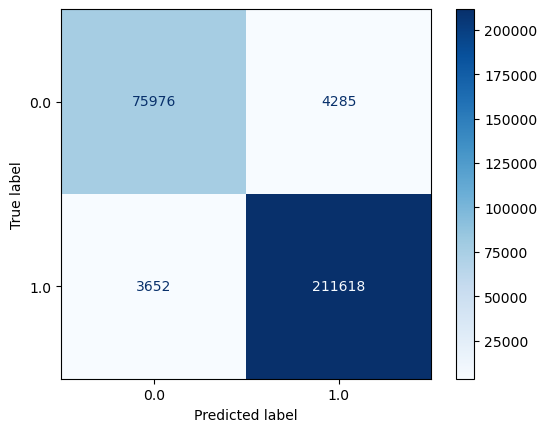

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#print confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


The confusion matrix shows that the model correctly identified 211,618 (98.3%) students who took the SM and incorrectly identified 3,652 (1.7%).

As for the students who did not take the SM (which are our primary focus), the model correctly identified 75,976 (94.7%) of them and incorrectly identified 4,285 (5.3%).

Conclusion

A machine learning model was developed based on the premise that students who do not take the SM assessment have a high likelihood of dropping out at the end of the semester. The variables considered to identify these students were:

Total minutes of access
Total number of accesses
Total number of assessments completed
The results for identifying students who did not take the SM:

- Accuracy: 97.3%
- Recall (for students who did not take the SM): 95%
- Precision (for students who did not take the SM): 95%
- F1-Score (for students who did not take the SM): 95%


The result of the metrics validates the variables used and makes them good indicators for understanding the risk of dropout. They also indicate that the model is efficient in identifying students who did not take the SM, which is the focus of the research and crucial for validating strategic implementations aimed at minimizing student dropout.